# Understand the Problem

A Empresa TopBank
Disclaimer: O Contexto a seguir, é completamente fictício, a empresa, o contexto, o CEO, as perguntas de negócio existem somente na minha imaginação. 

A TopBank é uma grande empresa de serviços bancários. Ela atua principalmente nos países da Europa oferecendo produtos financeiros, desde contas bancárias até investimentos, passando por alguns tipos de seguros e produto de investimento.

O modelo de negócio da empresa é do tipo serviço, ou seja, ela comercializa serviços bancários para seus clientes através de agências físicas e um portal online. 

O principal produto da empresa é uma conta bancária, na qual o cliente pode depositar seu salário, fazer saques, depósitos e transferência para outras contas. Essa conta bancária não tem custo para o cliente e tem uma vigência de 12 meses, ou seja, o cliente precisa renovar o contrato dessa conta para continuar utilizando pelos próximos 12 meses.

Segundo o time de Analytics da TopBank, cada cliente que possui essa conta bancária retorna um valor monetário de 15% do valor do seu salário estimado, se esse for menor que a média e 20% se esse salário for maior que a média, durante o período vigente de sua conta. Esse valor é calculado anualmente. 

Por exemplo, se o salário mensal de um cliente é de R$1.000,00 e a média de todos os salários do banco é de R$800. A empresa, portanto, fatura R$ 200 anualmente com esse cliente. Se esse cliente está no banco há 10 anos, a empresa já faturou R$2.000,00 com suas transações e utilização da conta. 

Nos últimos meses, o time de Analytics percebeu que a taxa de clientes cancelando suas contas e deixando o banco, atingiu números inéditos na empresa. Preocupados com o aumento dessa taxa, o time planejou um plano de ação para diminuir taxa de evasão de clientes.

Preocupados com a queda dessa métrica, o time de Analytics da TopBottom, contratou você como consultor de Data Science para criar um plano de ação, com o objetivo de reduzir a evasão de clientes, ou seja, impedir que o cliente cancele seu contrato e não o renove por mais 12 meses. Essa evasão, nas métricas de negócio, é conhecida como Churn.

De maneira geral, Churn é uma métrica que indica o número de clientes que cancelaram o contrato ou pararam de comprar seu produto em um determinado período de tempo. Por exemplo, clientes que cancelaram o contrato de serviço ou após o vencimento do mesmo, não renovaram, são clientes considerados em churn.

Outro exemplo seria os clientes que não fazem uma compra à mais de 60 dias. Esse clientes podem ser considerados clientes em churn até que uma compra seja realizada. O período de 60 dias é totalmente arbitrário e varia entre empresas. 

O Desafio

Como um Consultor de Ciência de Dados, você precisa criar um plano de ação para diminuir o número de clientes em churn e mostrar o retorno financeiro da sua solução.

Ao final da sua consultoria, você precisa entregar ao CEO da TopBottom um modelo em produção, que receberá uma base de clientes via API e retornará essa mesma base “scorada”, ou seja, um coluna à mais com a probabilidade de cada cliente entrar em churn.

Além disso, você precisará fornecer um relatório reportando a performance do seu modelo e o impacto financeiro da sua solução. Questões que o CEO e o time de Analytics gostariam de ver em seu relatório:

Qual a taxa atual de Churn da TopBank? Como ela varia mensalmente?
Qual a Performance do modelo em classificar os clientes como churns?
Qual o retorno esperado, em termos de faturamento, se a empresa utilizar seu modelo para evitar o churn dos clientes?
Uma possível ação para evitar que o cliente entre em churn é oferecer um cupom de desconto, ou alguma outro incentivo financeiro para ele renovar seu contrato por mais 12 meses.

Para quais clientes você daria o incentivo financeiro e qual seria esse valor, de modo a maximizar o ROI (Retorno sobre o investimento). Lembrando que a soma dos incentivos para cada cliente não pode ultrapassar os  R$10.000,00
Os Dados
O conjunto de dados que será utilizado para criar a solução para a TopBottom, está disponível na plataforma do Kaggle. Esse é o link: ChurnDataset 

Cada linha representa um cliente e cada coluna contém alguns atributos que descrevem esse cliente. O conjunto de dados inclui informações sobre:



RowNumber: O número da coluna

CustomerID: Identificador único do cliente

Surname: Sobrenome do cliente.

CreditScore: A pontuação de Crédito do cliente para o mercado de consumo.

Geography: O país onde o cliente reside.

Gender: O gênero do cliente.

Age: A idade do cliente.

Tenure: Número de anos que o cliente permaneceu ativo.

Balance: Valor monetário que o cliente tem em sua conta bancária.

NumOfProducts: O número de produtos comprado pelo cliente no banco.

HasCrCard: Indica se o cliente possui ou não cartão de crédito.

IsActiveMember: Indica se o cliente fez pelo menos uma movimentação na conta bancário dentro de 12 meses.

EstimateSalary: Estimativa do salário mensal do cliente.

Exited: Indica se o cliente está ou não em Churn.

# 0. Imports

## 0.1. Libraries

In [168]:
from IPython.core.display      import display, HTML
from IPython.display           import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import inflection
import math
import datetime

from scipy                     import stats as ss
from boruta                    import BorutaPy

# balancing data
from imblearn   import under_sampling  as us
from imblearn   import over_sampling   as oversamp
from imblearn   import combine         as c

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing     import RobustScaler, MinMaxScaler, LabelEncoder, StandardScaler

# algorithms
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, IsolationForest, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# model evaluation and metrics
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import brier_score_loss, classification_report, roc_curve

# models' cross-validation
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, RandomizedSearchCV

# models' metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef, make_scorer, roc_curve 

## 0.2. Helper Functions

In [132]:
def jupyter_settings():
    
    !matplotlib inline
    !pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]

    plt.rcParams['font.size'] = 12
    
    display(HTML("<style>.container { width:95% !important; }</style>"))
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
    

def new_columns(df):    
    cols_old = df.columns.tolist()
    snakename = lambda x: inflection.underscore(x)
    cols_new = list(map(snakename, cols_old))
    df.columns = cols_new
    
    
def num_analysis(num_attributes):
    # Cemtral tendency - mean, median
    ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(num_attributes.apply(np.std)).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

    # concatenate
    m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
    m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis',]
    
    # histogram
    num_hist = num_attributes.hist(bins=30)
    
    # DataFrame
    return m
    
    # Histogram
    return num_hist


# Model's performance function
def ml_performance(model_name, y, yhat):
    mae = mean_absolute_error(y, yhat)
    mape = mean_absolute_percentage_error(y,yhat)
    rmse = np.sqrt(mean_squared_error(y, yhat))
    
    return pd.DataFrame({'Model Name': model_name,
                         'MAE': mae,
                         'MAPE': mape,
                         'RMSE': rmse }, index=[0])

In [3]:
jupyter_settings()

'matplotlib' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.
'pylab' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


## 0.3. Data

In [4]:
df_raw = pd.read_csv('data/churn.csv')

In [5]:
df_raw.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# 1. Data Description

In [6]:
df1 = df_raw.copy()

## 1.1. Columns

In [7]:
df1.columns.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [8]:
new_columns(df1)

In [9]:
df1.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 1.2. Data dimentions

In [10]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 10000
Number of Columns: 14


## 1.3.  Data Types

In [11]:
df1.dtypes

row_number            int64
customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

## 1.4. Check NA

In [12]:
df1.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [13]:
df1.isnull().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [14]:
df1.eq(0).sum()

row_number             0
customer_id            0
surname                0
credit_score           0
geography              0
gender                 0
age                    0
tenure               413
balance             3617
num_of_products        0
has_cr_card         2945
is_active_member    4849
estimated_salary       0
exited              7963
dtype: int64

## 1.5. Descriptive Statistics

In [15]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(include = ['object'])

### 1.5.1. Numerical attributes

In [16]:
num_attributes.head()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [17]:
num_analysis(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,row_number,1.00,10000.00,9999.00,5.000500e+03,5.000500e+03,2886.751332,0.000000,-1.200000
1,customer_id,15565701.00,15815690.00,249989.00,1.569094e+07,1.569074e+07,71932.589224,0.001149,-1.196113
2,credit_score,350.00,850.00,500.00,6.505288e+02,6.520000e+02,96.648466,-0.071607,-0.425726
3,age,18.00,92.00,74.00,3.892180e+01,3.700000e+01,10.487282,1.011320,1.395347
4,tenure,0.00,10.00,10.00,5.012800e+00,5.000000e+00,2.892030,0.010991,-1.165225
5,balance,0.00,250898.09,250898.09,7.648589e+04,9.719854e+04,62394.285254,-0.141109,-1.489412
6,num_of_products,1.00,4.00,3.00,1.530200e+00,1.000000e+00,0.581625,0.745568,0.582981
7,has_cr_card,0.00,1.00,1.00,7.055000e-01,1.000000e+00,0.455818,-0.901812,-1.186973
8,is_active_member,0.00,1.00,1.00,5.151000e-01,1.000000e+00,0.499772,-0.060437,-1.996747
9,estimated_salary,11.58,199992.48,199980.90,1.000902e+05,1.001939e+05,57507.617221,0.002085,-1.181518


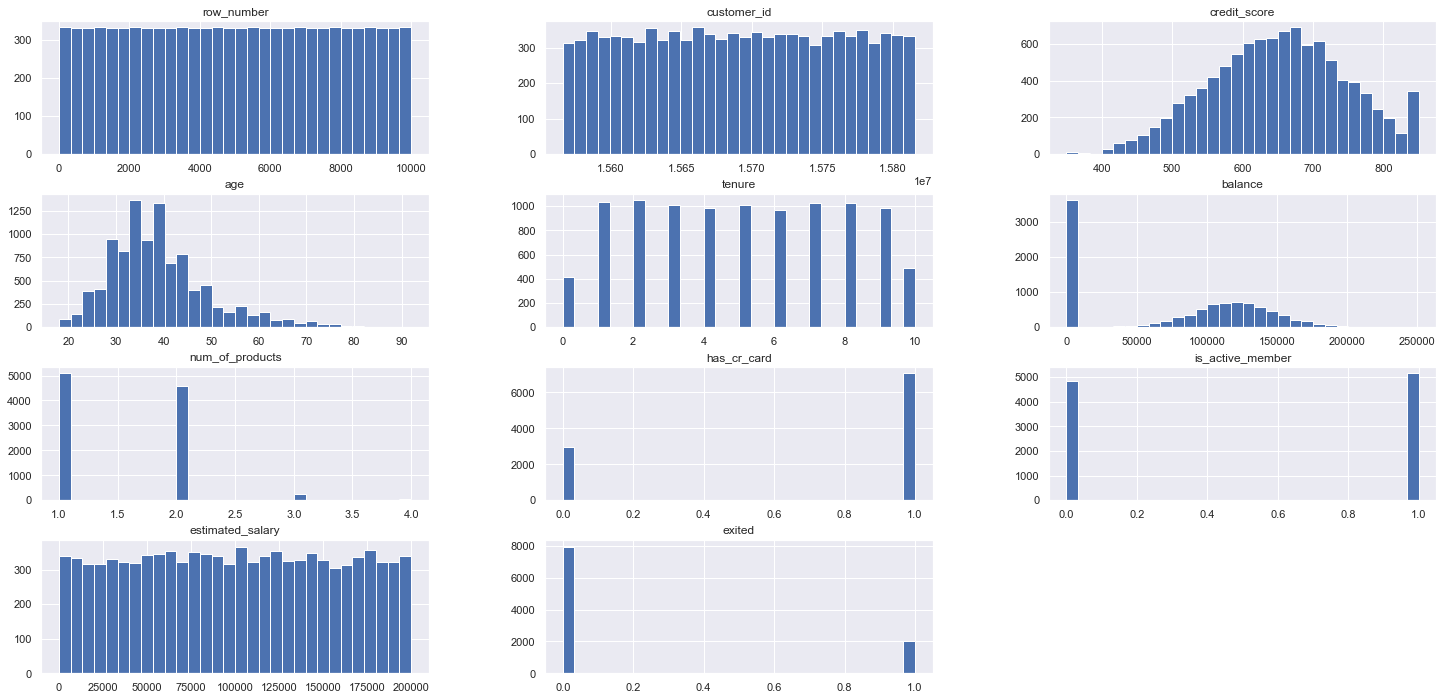

In [18]:
num_attributes.hist(bins=30);

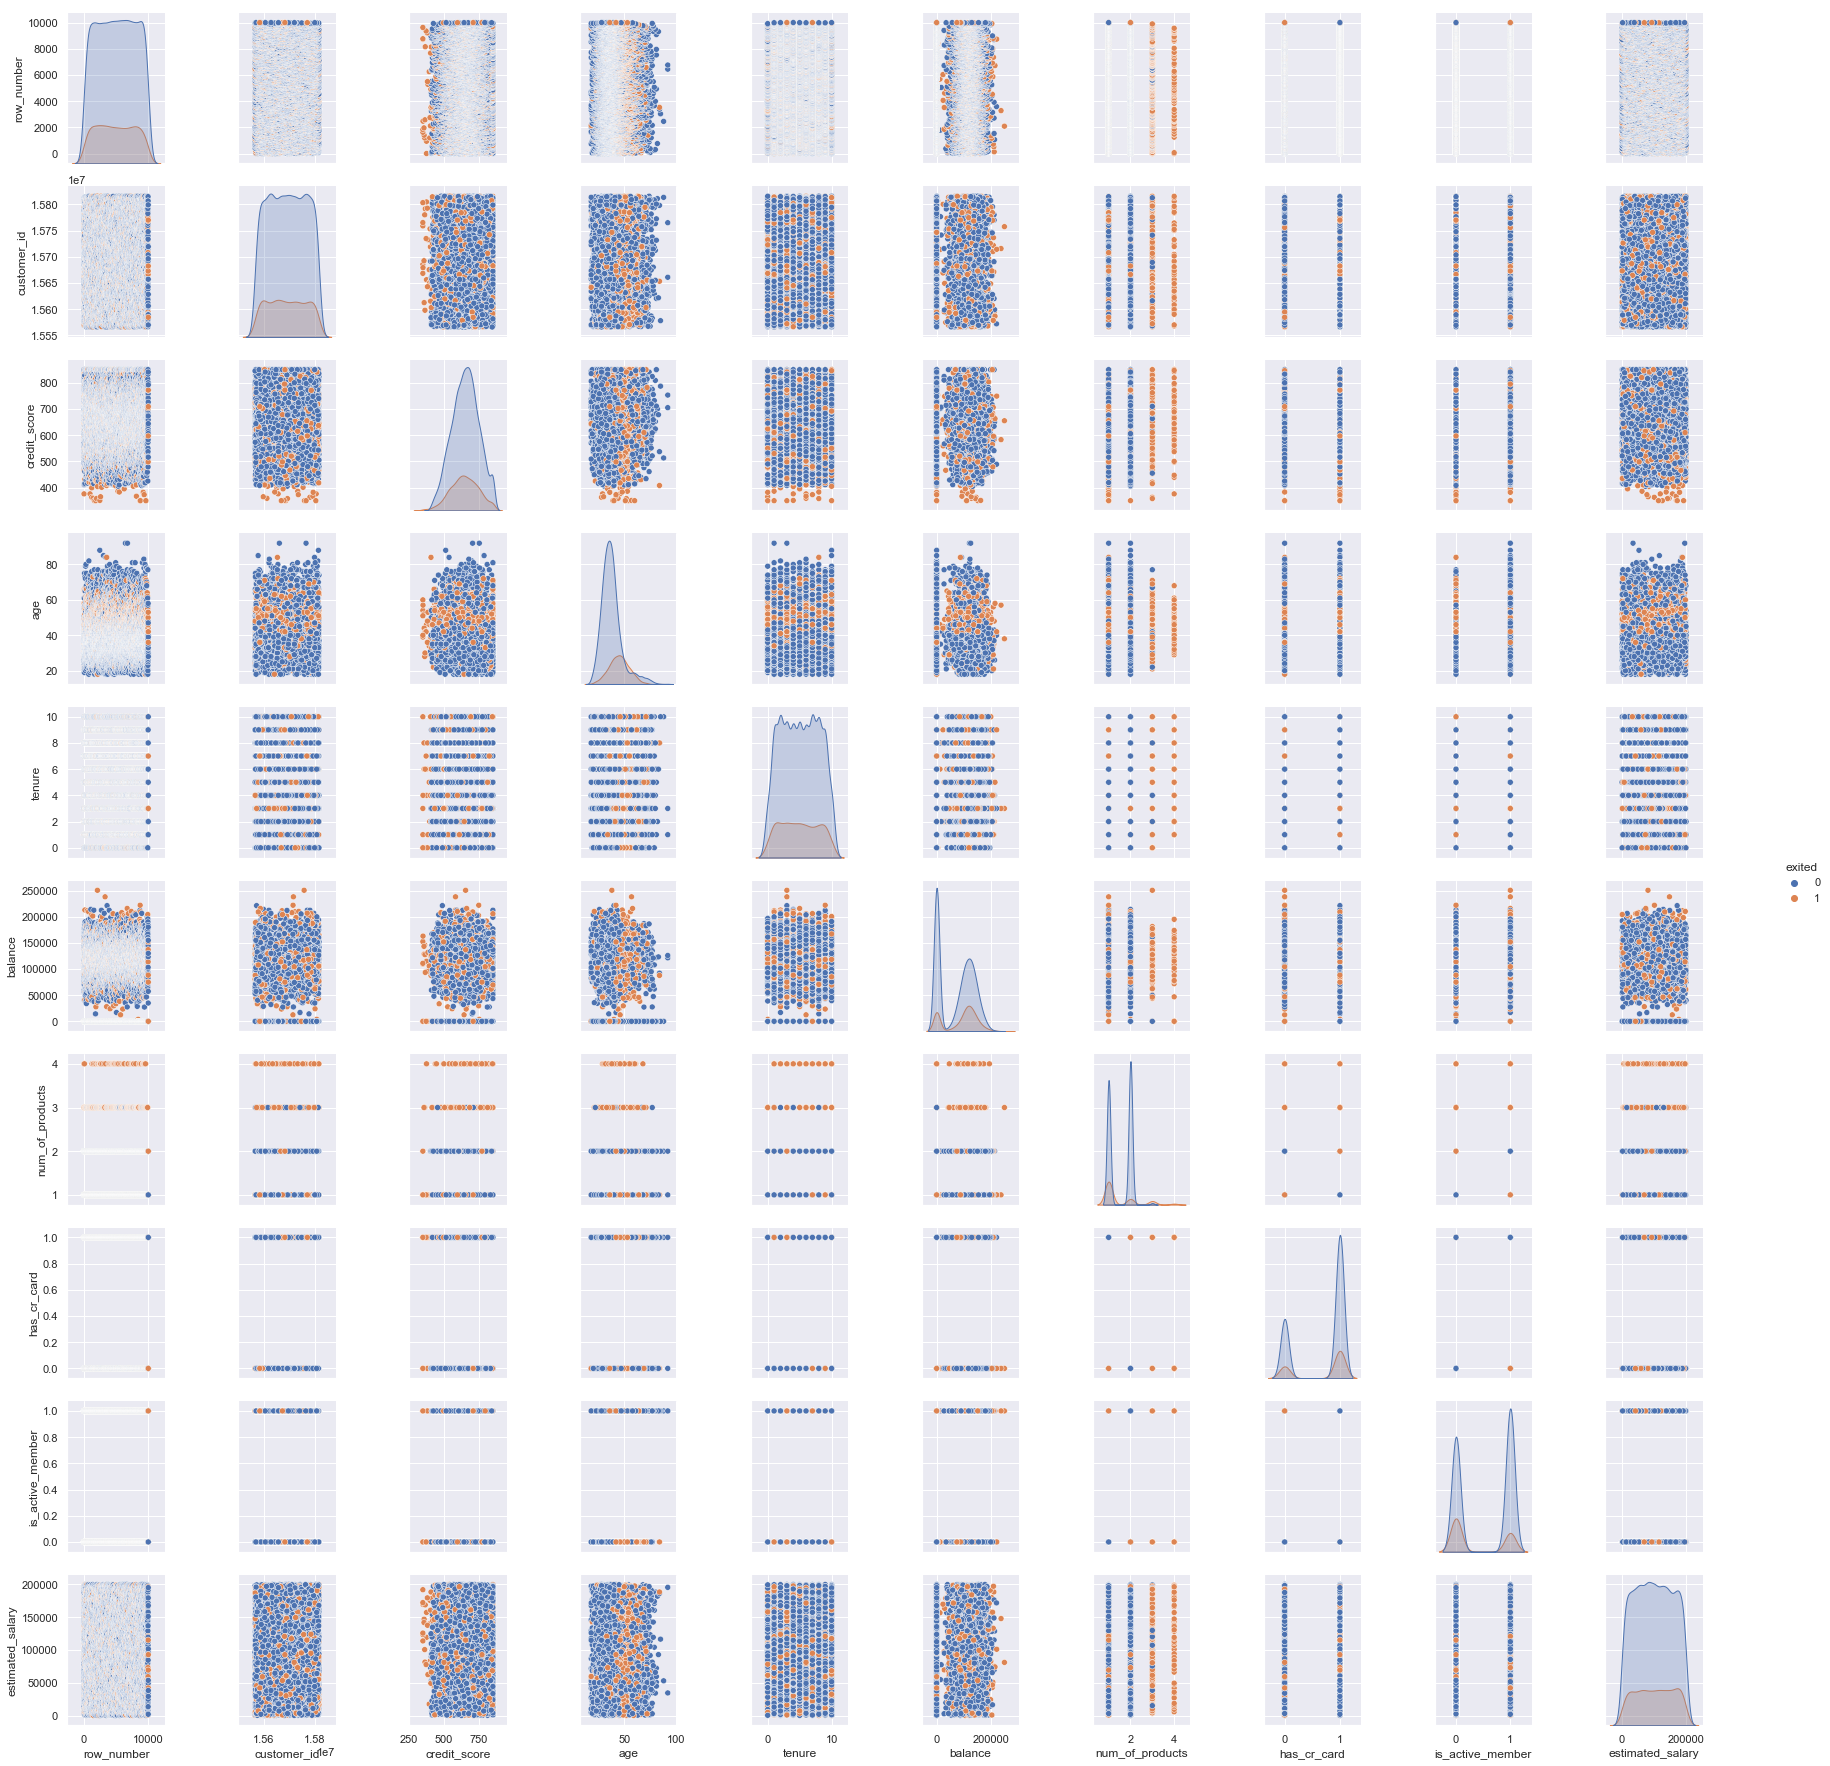

In [81]:
sns.pairplot(num_attributes, hue='exited') # unbalanced 'exited' variable

### 1.5.2. Categorical attributes

In [54]:
cat_attributes.head(10)

,surname,geography,gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
5,Chu,Spain,Male
6,Bartlett,France,Male
7,Obinna,Germany,Female
8,He,France,Male
9,H?,France,Male


In [78]:
cat_attributes.apply(lambda x: x.unique().shape)

,surname,geography,gender
0,2932,3,2


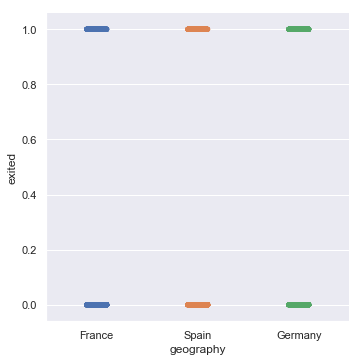

In [140]:
sns.catplot(x='geography', y='exited', data=df1)

In [117]:
aux1 = df1[['geography', 'estimated_salary']].groupby('geography')

In [137]:
aux1.describe().T

geography                      France        Germany          Spain
estimated_salary count    5014.000000    2509.000000    2477.000000
                 mean    99899.180814  101113.435102   99440.572281
                 std     57336.289016   58263.011501   57103.678091
                 min        90.070000      11.580000     417.410000
                 25%     51399.190000   51016.020000   50267.690000
                 50%     99132.310000  102397.220000   99984.860000
                 75%    149295.360000  151083.800000  147278.430000
                 max    199929.170000  199970.740000  199992.480000

# 2. Feature Engineering

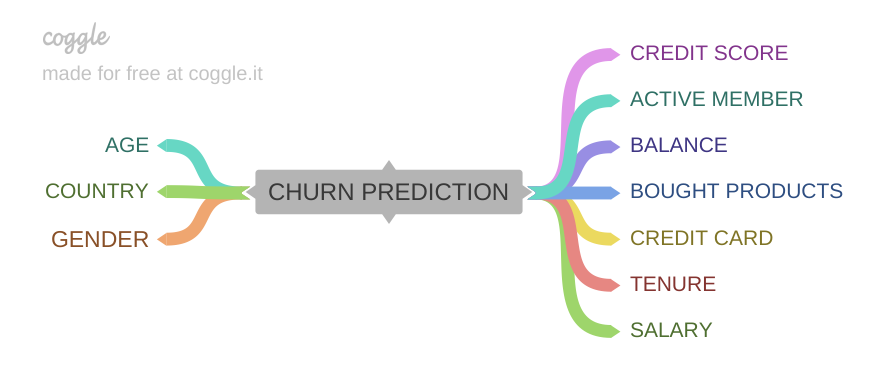

In [86]:
Image('img/CHURN_PREDICTION.png')

### Monetary related data

CreditScore: A pontuação de Crédito do cliente para o mercado de consumo.

Balance: Valor monetário que o cliente tem em sua conta bancária.

NumOfProducts: O número de produtos comprado pelo cliente no banco.

HasCrCard: Indica se o cliente possui ou não cartão de crédito.

IsActiveMember: Indica se o cliente fez pelo menos uma movimentação na conta bancário dentro de 12 meses.

EstimateSalary: Estimativa do salário mensal do cliente.

Tenure: Número de anos que o cliente permaneceu ativo.
### Client description

RowNumber: O número da coluna

CustomerID: Identificador único do cliente

Surname: Sobrenome do cliente.

Geography: O país onde o cliente reside.

Gender: O gênero do cliente.

Age: A idade do cliente.

### Response variable

Exited: Indica se o cliente está ou não em Churn.

## Monetary related hypothesis

1. Clients with higher credit score are less likely to churn

2. Clients with higher balance are less likely to churn

3. Clients with higher number of products boght are less likely to churn

4. Clients with a credit card are less likely to churn

5. Clients that are active members are less likely to churn

6. Clients with higher estimatd salaries are less likely to churn

## Descriptive related hypothesis

1. Clients from Spain have higher churn rate

2. Male clients have higher churn rate

3. Older clients have higher churn rte

4. Clients with higher tenura are less likely to churn

In [19]:
df2 = df1.copy()

In [20]:
# geography
df2['geography'] = df2['geography'].apply(lambda x: 0 if x=='France' else 1 if x=='Spain' else 2)

# gender
df2['gender'] = df2['gender'].apply(lambda x: 0 if x=='Male' else 1)

In [21]:
df2.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10,0


# 3. Data Filter

In [22]:
df3 = df2.copy()

## 3.1. Rows Filtes

## 3.2. Columns Filter

In [23]:
df3 = df3.drop(['row_number', 'customer_id', 'surname'], axis=1)

In [24]:
df3.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


# 4. EDA

### The three objectives of Exploratory Data Analysis:

**1.** To acquire new business insights.

**2.** Validate previous business insights.

**3.** Perceive variables that are importante in the modelling of the phenomenon in case.

### Types of analysis:

**1.** Univariate: how is the variable distribution (min, max, distribution, range...)

**2.** Bivariate: how does this variable influence the response variable (correlation, hypothesis validation...)

**3.** Multivariate: how do variables correlate to each other?

In [79]:
from ClfAutoEDA import *

### EDA Parameters


Once the module is imported, you can call
EDA function in your python @le which
will automatically do all the required
exploration on your dataset. Before calling
the function we must understand the
function parameters:
EDA(df,labels,target_variable_
name,

data_summary_figsize,corr_matr
ix_figsize,

data_summary_figcol,corr_matri
x_figcol,
 corr_matrix_annot,
 pairplt_col,pairplt,

feature_division_figsize)
df : dataframe containing your
classi@cation data
labels: 1D list of str. (The names given to
the labels of the target variable )
target_variable_name: variable of str.
(The name of the target variable in the
dataset)

data_summary_7gsize: tuple. (The size
of @gure containing data summary),
default: (16,16)

corr_matrix_7gsize: tuple. (The size of
@gure containing correlation matrix),
default: (16,16)

data_summary_7gcol: str. (The color
name of @gure containing data summary),
default: ‘Reds_r’

corr_matrix_7gcol: str. (The color name
of @gure containing correlation matrix),
default: ‘Blues’

corr_matrix_annot: boolean. (True if you
want to display annotations/coeTcients
on the correlation matrix), default: False
pairplt_col: 1D list of str. (The names of
the columns/features for which pairplots
are required), default: ‘all’ (All the
features will be taken)

pairplt: boolean. (True if you want to
pairplots), default: False

feature_division_7gsize: tuple. (The size
of @gure containing bar and pie plot of
proportion of target and categorical
feature labels), default: (12,12)

NOTE- This function returns 3 items
(dataframe after removing null values,
list of numerical features, list of
categorical features) apart from the
EDA plots and data description. The EDA
plots include heatmaps of correlation
matrix, data summary, missing values,
skewness plots, violin plots, pairplots,
boxplots and categorical features’
distribution bar and pie charts.

In [26]:
df4 = df3.copy()

In [27]:
df4.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df4[df4['exited']==1].count()

credit_score        2037
geography           2037
gender              2037
age                 2037
tenure              2037
balance             2037
num_of_products     2037
has_cr_card         2037
is_active_member    2037
estimated_salary    2037
exited              2037
dtype: int64

<AxesSubplot:>

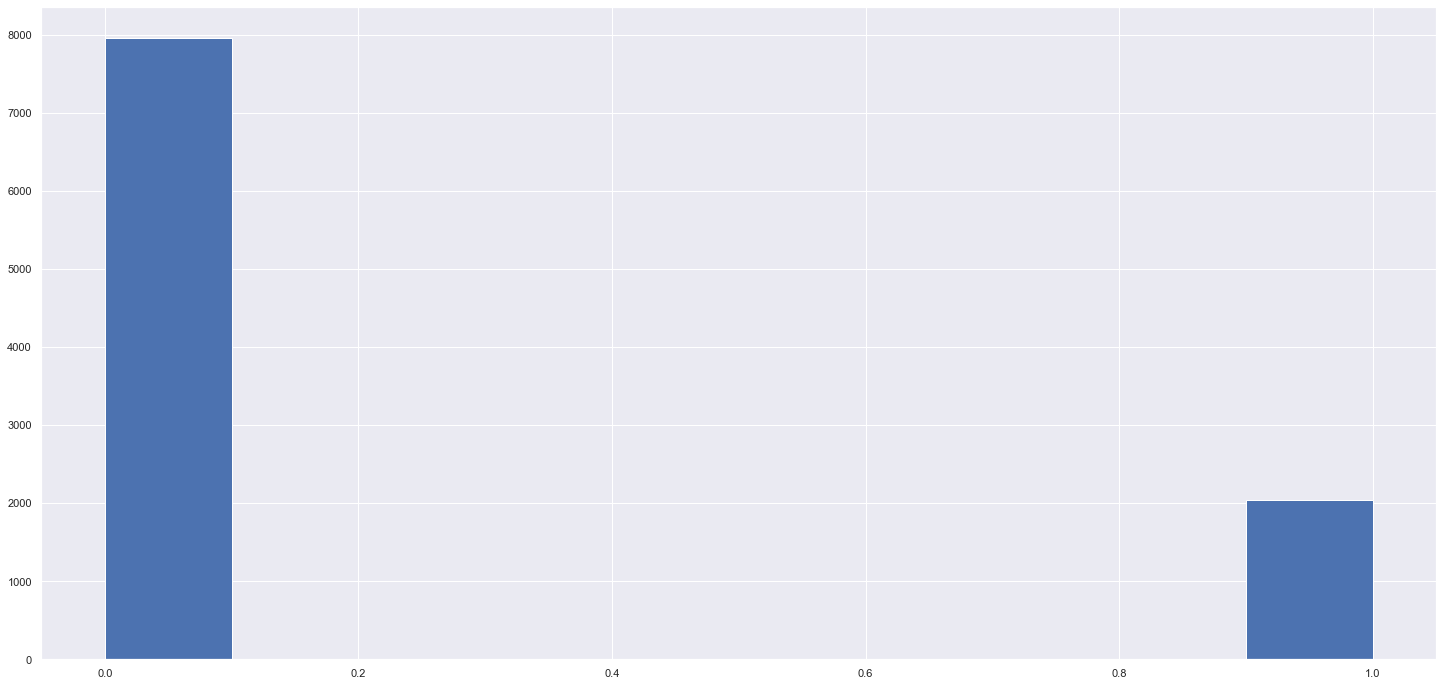

In [33]:
df4['exited'].hist()

# 5. Pre-Modeling

In [34]:
df5 = df4.copy()

## 5.1. Balancing Data

In [55]:
df4['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [42]:
# combine.SMOTETomek([sampling_strategy, …])	Class to perform over-sampling using SMOTE and cleaning using Tomek links.

ratio_balanced = {1:7963, 0:7963}

In [43]:
 # define sampler
smt = c.SMOTETomek( sampling_strategy=ratio_balanced, random_state=32, n_jobs=-1 )

In [52]:
# apply sampler
X_smt, y_smt = smt.fit_resample( df4.drop('exited', axis=1), df4['exited'] )

In [53]:
df4['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [102]:
X_smt

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
0,619,0,1,42,2,0.000000,1,1,1,101348.880000
1,502,0,1,42,8,159660.800000,3,1,0,113931.570000
2,850,1,1,43,2,125510.820000,1,1,1,79084.100000
3,645,1,0,44,8,113755.780000,2,1,0,149756.710000
4,822,0,0,50,7,0.000000,2,1,1,10062.800000
...,...,...,...,...,...,...,...,...,...,...
13639,620,0,1,45,3,68748.634458,1,1,0,167877.449524
13640,687,1,0,43,6,78242.151242,1,0,0,34306.536819
13641,645,0,1,37,6,130185.375172,1,1,1,153791.092122
13642,677,2,0,46,3,104816.395402,1,0,1,149438.346224


## 5.2. Standardize, Rescale, Transform

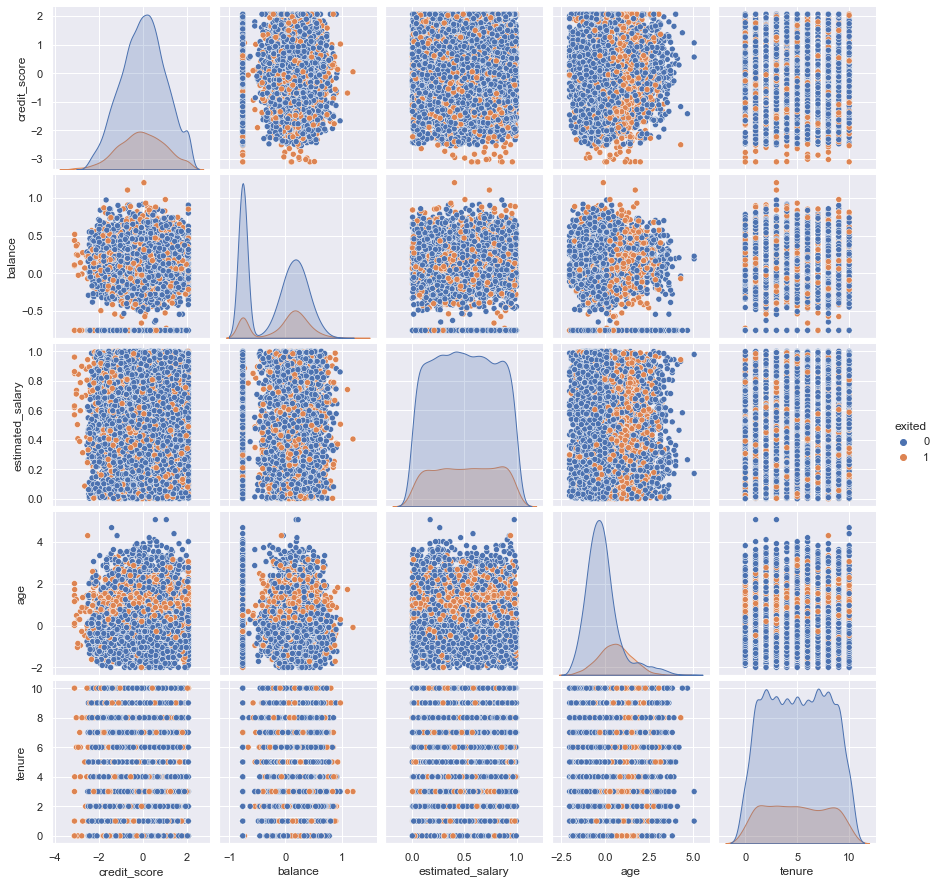

In [112]:
sns.pairplot(df4[['credit_score', 'balance', 'estimated_salary', 'age', 'tenure','exited']], hue='exited')

### Rescaling
MinMax: distributions without outliers

Robust Scaler: distributions with considerable outliers

c:\users\lucas\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

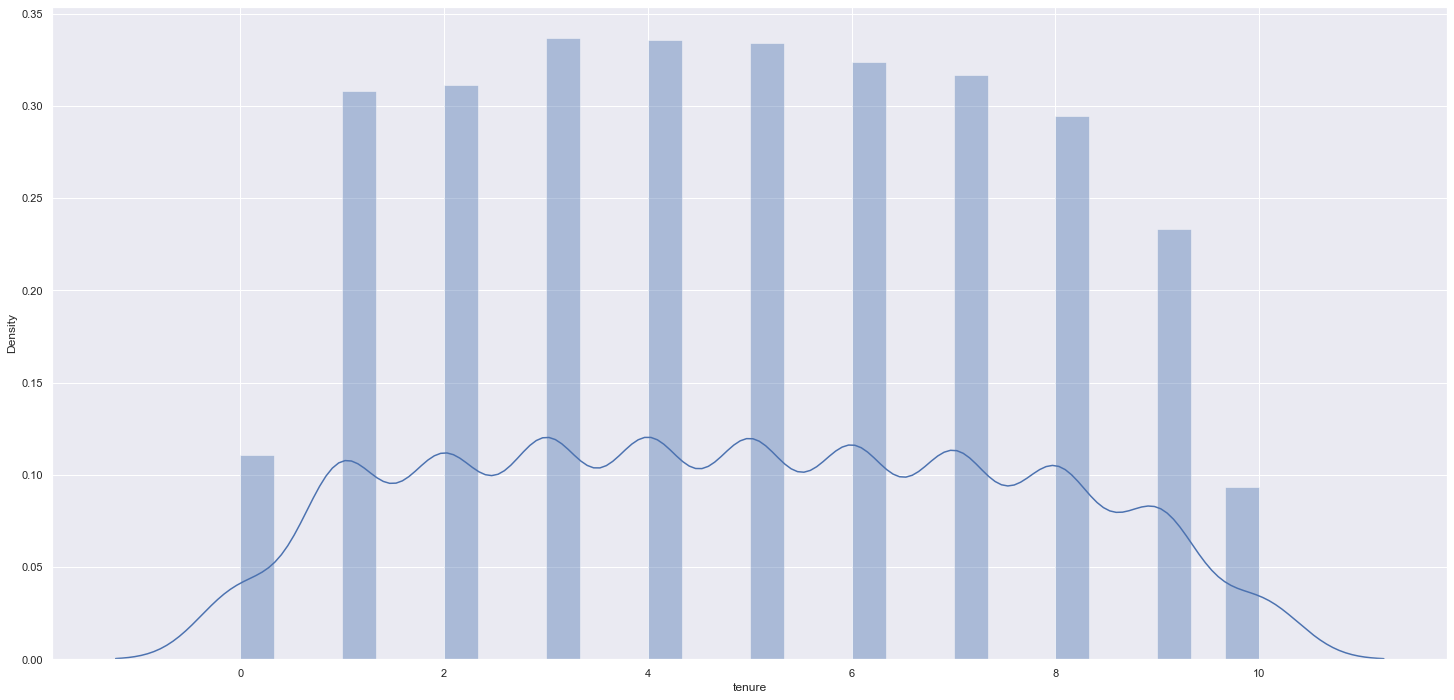

In [114]:
sns.distplot(X_smt['tenure'])

c:\users\lucas\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

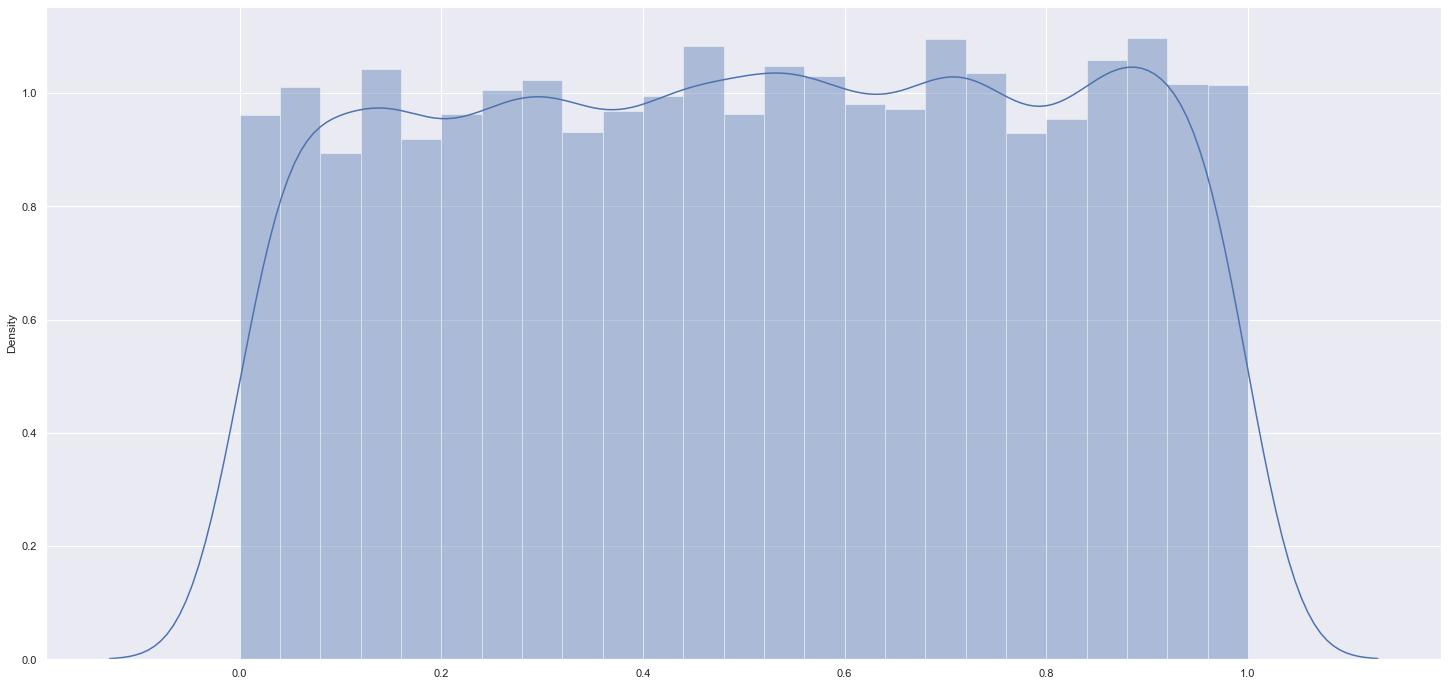

In [103]:
sns.distplot(MinMaxScaler().fit_transform(X_smt['estimated_salary'].values.reshape(-1,1)))

In [108]:
RobustScaler().fit_transform(X_smt['balance'].values.reshape(-1,1))

array([[-0.80480737],
       [ 0.42742064],
       [ 0.16385838],
       ...,
       [ 0.1999356 ],
       [ 0.00414322],
       [-0.47028034]])

In [115]:
# Robust Scaler: balance
X_smt['balance'] = RobustScaler().fit_transform(X_smt['balance'].values.reshape(-1,1))


# MinMax: estimated_salary
X_smt['estimated_salary'] = MinMaxScaler().fit_transform(X_smt['estimated_salary'].values.reshape(-1,1))
X_smt['tenure'] = MinMaxScaler().fit_transform(X_smt['tenure'].values.reshape(-1,1))

### Normalization

c:\users\lucas\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

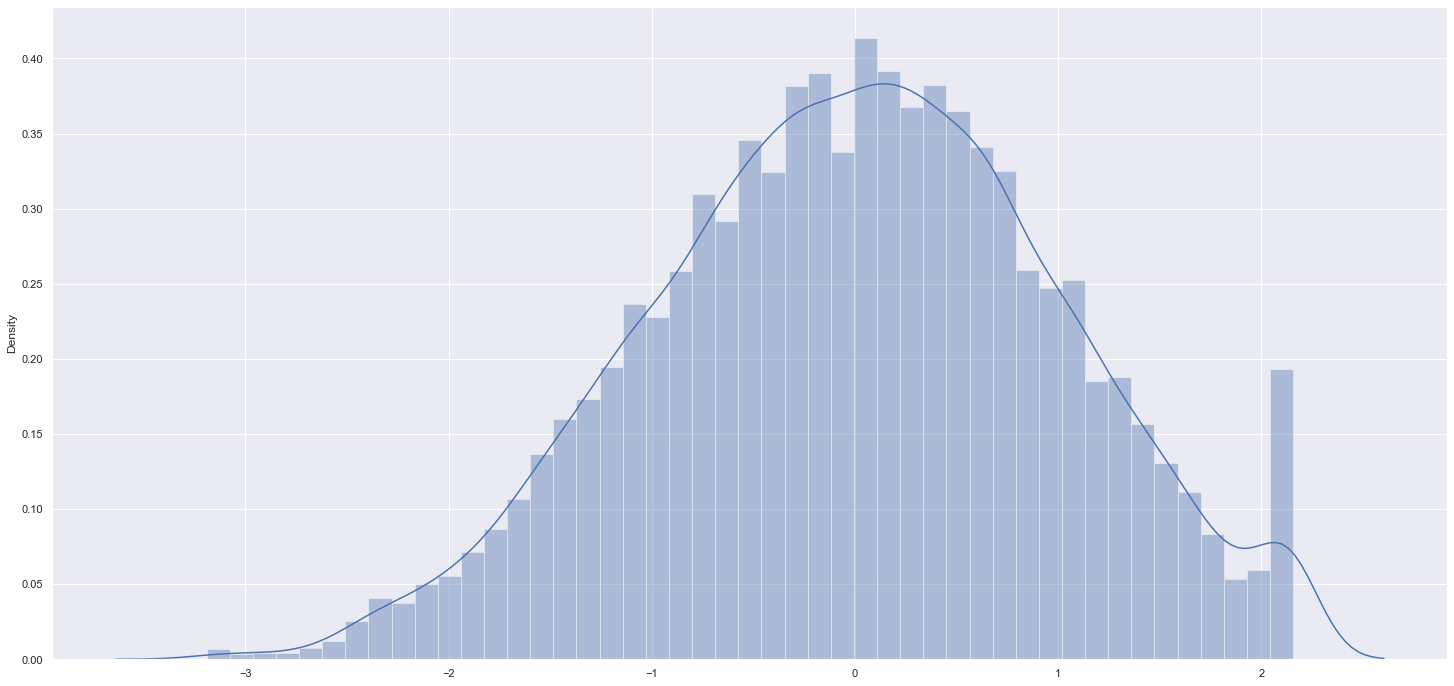

In [111]:
sns.distplot(StandardScaler().fit_transform(X_smt['credit_score'].values.reshape(-1,1)))

In [110]:
# age
X_smt['age'] = StandardScaler().fit_transform(X_smt['age'].values.reshape(-1,1))

# credit_score
X_smt['credit_score'] = StandardScaler().fit_transform(X_smt['credit_score'].values.reshape(-1,1))


# 6. Feature Selection and Data Split

In [125]:
df4 = pd.concat([X_smt, y_smt], axis=1)
df5 = df4.copy()
df5.head() # no selection needed

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,-0.313859,0,1,0.108646,0.2,-0.804807,1,1,1,0.506735,1
1,-1.565148,0,1,0.108646,0.8,0.427421,3,1,0,0.569654,1
2,2.156634,1,1,0.208990,0.2,0.163858,1,1,1,0.395400,0
3,-0.035795,1,0,0.309333,0.8,0.073135,2,1,0,0.748797,1
4,1.857181,0,0,0.911392,0.7,-0.804807,2,1,1,0.050261,0


# 7. ML Models

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.3, random_state=42)

## Dummy Classifier

In [139]:
# Dummie
dmm = DummyClassifier(strategy='most_frequent')

In [171]:
performance(dmm, X_train, y_train)

c:\users\lucas\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lucas\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\lucas\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lucas\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
c:\users\lucas\miniconda3\

,test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc_score,test_mcc
0,0.501466,0.0,0.0,0.0,0.5,0.0


## Adaboost Classifier

In [137]:
ab = AdaBoostClassifier()

In [138]:
performance(ab, X_train, y_train)

,test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc_score,test_mcc
0,0.796021,0.792848,0.800049,0.796291,0.796037,0.592291


## KNeighborsClassifier

In [141]:
knc = KNeighborsClassifier()

In [154]:
x = performance(knc, X_train, y_train)
x

,test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc_score,test_mcc
0,0.785759,0.775477,0.802778,0.788785,0.785811,0.572087


## RandomForestClassifier

In [143]:
rfc = RandomForestClassifier()

In [145]:
performance(rfc, X_train, y_train)

,test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc_score,test_mcc
0,0.840838,0.835874,0.847306,0.841484,0.84086,0.681861


## XGBClassifier

In [169]:
xgb = XGBClassifier()

In [170]:
performance(xgb, X_train, y_train)

c:\users\lucas\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:52:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lucas\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:52:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lucas\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lucas\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lucas\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:52:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lucas\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lucas\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:52:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lucas\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:52:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lucas\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:52:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lucas\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:52:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc_score,test_mcc
0,0.840105,0.83128,0.852346,0.841579,0.840143,0.680624


# 8. Hyperparameter Fine Tuning

# 9. Error Interpretation

# 10. Model Deploy